## importing libraries

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Datasets

In [23]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## performming EDA with dtale

In [24]:
import dtale
dtale.show(data)

## Label encoding to the Gender column

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)

In [26]:
data=data.drop('CustomerID',axis=1)

drop useless columns

In [27]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## segmentation based on annual income and spending score

In [28]:
x=data[['Annual Income (k$)','Spending Score (1-100)']].values

In [29]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Best number of cluster

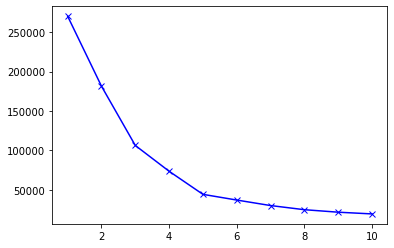

In [30]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42).fit(x)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,'bx-')
plt.show()

best cluster is 5

## getting the classes

In [31]:
model=KMeans(n_clusters=5,init='k-means++',random_state=42)
label=model.fit_predict(x)

In [32]:
label

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

## visualizing the classes

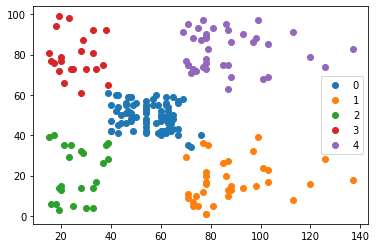

In [33]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(x[label == i , 0] , x[label == i , 1] , label = i)
plt.legend()
plt.show()

## segmentation based on age and spending score

In [34]:
x1=data[['Age','Spending Score (1-100)']].values
x1

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

## checking for best number of cluster

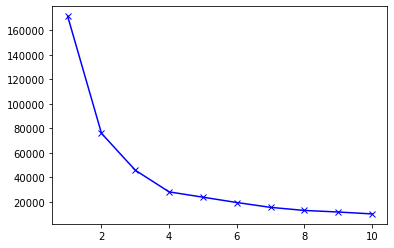

In [35]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42).fit(x1)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,'bx-')
plt.show()

best cluster is 4

## getting the classes


In [36]:
model=KMeans(n_clusters=3,init='k-means++',random_state=42)
label=model.fit_predict(x1)

## visualizing the classes

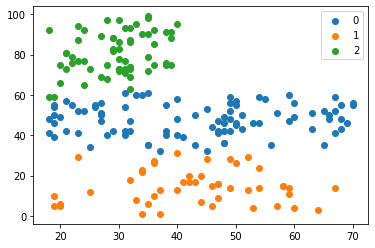

In [37]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(x1[label == i , 0] , x1[label == i , 1] , label = i)
plt.legend()
plt.show()

## segmentation based on Gender and spending score

In [38]:
x2=data[['Gender','Spending Score (1-100)']].values
x2

array([[ 1, 39],
       [ 1, 81],
       [ 0,  6],
       [ 0, 77],
       [ 0, 40],
       [ 0, 76],
       [ 0,  6],
       [ 0, 94],
       [ 1,  3],
       [ 0, 72],
       [ 1, 14],
       [ 0, 99],
       [ 0, 15],
       [ 0, 77],
       [ 1, 13],
       [ 1, 79],
       [ 0, 35],
       [ 1, 66],
       [ 1, 29],
       [ 0, 98],
       [ 1, 35],
       [ 1, 73],
       [ 0,  5],
       [ 1, 73],
       [ 0, 14],
       [ 1, 82],
       [ 0, 32],
       [ 1, 61],
       [ 0, 31],
       [ 0, 87],
       [ 1,  4],
       [ 0, 73],
       [ 1,  4],
       [ 1, 92],
       [ 0, 14],
       [ 0, 81],
       [ 0, 17],
       [ 0, 73],
       [ 0, 26],
       [ 0, 75],
       [ 0, 35],
       [ 1, 92],
       [ 1, 36],
       [ 0, 61],
       [ 0, 28],
       [ 0, 65],
       [ 0, 55],
       [ 0, 47],
       [ 0, 42],
       [ 0, 42],
       [ 0, 52],
       [ 1, 60],
       [ 0, 54],
       [ 1, 60],
       [ 0, 45],
       [ 1, 41],
       [ 0, 50],
       [ 1, 46],
       [ 0, 51

## checking for best cluster

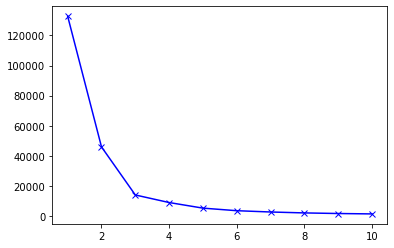

In [39]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42).fit(x2)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,'bx-')
plt.show()

best cluster is 2

## getting the classes

In [40]:
model=KMeans(n_clusters=2,init='k-means++',random_state=42)
label=model.fit_predict(x2)

## visualizing the classes

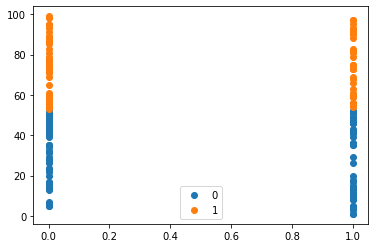

Executing shutdown due to inactivity...


2022-02-03 19:14:09,151 - INFO     - Executing shutdown due to inactivity...


In [41]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(x2[label == i , 0] , x2[label == i , 1] , label = i)
plt.legend()
plt.show()